Each 50: Loss = 0.03944866359233856
Each 100: Loss = 0.035811737179756165
Each 150: Loss = 0.0331188440322876
Each 200: Loss = 0.03112369030714035
Each 250: Loss = 0.029645616188645363
Each 300: Loss = 0.02855011820793152
Each 350: Loss = 0.0277385413646698
Each 400: Loss = 0.027137158438563347
Each 450: Loss = 0.026691725477576256
Each 500: Loss = 0.026361485943198204


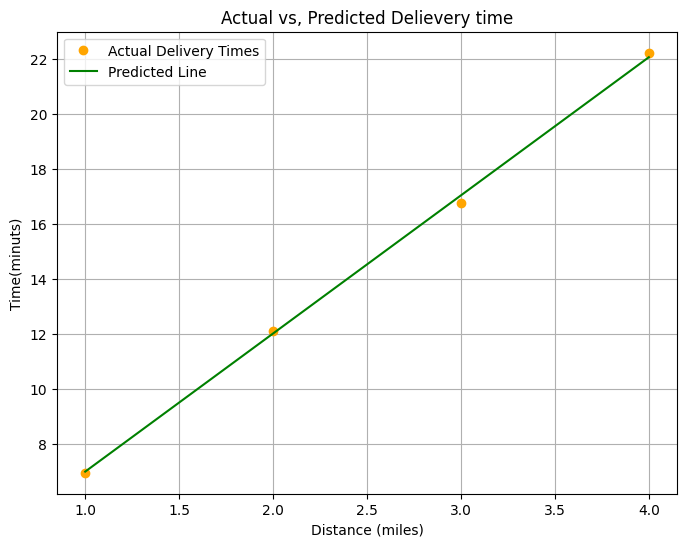

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import utils

torch.manual_seed(42)


distance = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float32)
times = torch.tensor([[6.96], [12.11], [16.77], [22.21]], dtype=torch.float32)

#Model with one input and one output
model = nn.Sequential(nn.Linear(1,1))

#Loss. function 
#MSELoss - Mean Squared Error loss function - It measures how wrong your predictions are.
loss_function = nn.MSELoss()

#Optimizer SGD - Stochastic Gradient Descent optimizer - It adjusts models weight and bias parameters based on the error
#lr=0.01-THis learning rate controls how big each adjustment step i
optimizer = optim.SGD(model.parameters(), lr=0.01)


#Training the model loop.
#optimizer.zero_grad(): Clears gradients from the previous round. Without this pytorch would accumulate adjustment which could break the learning process
#output = model(distance): Performs the forward pass where the model makes predictions based on the input distance
#loss loss_function(outputs, tiles): calculates how worng the predcted outpts are by compareing them to actual times
#loss.backword(): backward pass (backpropogarion) is performed, which calculated exactly how to adjust the weight and bias to reduce error
#optimizer.step(): Updated the model'sparamters using those calculated adjustments
#Lossis prented every 50 epochs

for epoch in range(500):
    #Reset the optimizer gradients
    optimizer.zero_grad()
    #make predictions (forward pass)
    outputs = model(distance)
    # Calculate the loss
    loss = loss_function(outputs, times)
    #Calculate adjustments (backward pass)
    loss.backward()
    #update the model's parameters
    optimizer.step()
    #Print loss every 50 epochs
    if(epoch+1) % 50 == 0:
        print(f"Each {epoch + 1}: Loss = {loss.item()}")


utils.plot_result(model, distance, times)


In [9]:
distance_to_predict=7.0

with torch.no_grad():
    #convert the python variable into a 2D pytorch tensor
    new_distance = torch.tensor([[distance_to_predict]], dtype=torch.float32)

    #Pass the new data to trained model for predict 
    predicted_time = model(new_distance)

    #use .item() to extract the scalar value from the tensor for printing
    print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time.item():.1f} minutes")

    #Use the scalar value in a conditional statement to make the final dicision
    if predicted_time.item() > 30:
        print("\n Decision: Do not take the job. you will likely to be late")
    else:
        print("\n Decision: Take the job. You can make it")



Prediction for a 7.0-mile delivery: 37.1 minutes

 Decision: Do not take the job. you will likely to be late


In [10]:
#Inspecting the model learning

layer = model[0]

#Get the weight and bias
weights  = layer.weight.data.numpy()
bias = layer.bias.data.numpy()

print(f"Weight: {weights}")
print(f"Bias: {bias}")


Weight: [[5.015503]]
Bias: [1.9849645]
